In [1]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib import request
import gzip

In [2]:
# MNIST dataset URLs
urls = {
    "train_images": "https://raw.githubusercontent.com/fgnt/mnist/master/train-images-idx3-ubyte.gz",
    "train_labels": "https://raw.githubusercontent.com/fgnt/mnist/master/train-labels-idx1-ubyte.gz",
    "test_images": "https://raw.githubusercontent.com/fgnt/mnist/master/t10k-images-idx3-ubyte.gz",
    "test_labels": "https://raw.githubusercontent.com/fgnt/mnist/master/t10k-labels-idx1-ubyte.gz"
}

Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


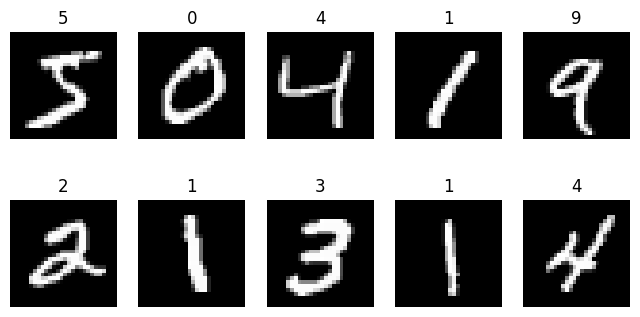

In [3]:
# Function to load MNIST images
def load_mnist_images(url):
    response = request.urlopen(url)
    with gzip.GzipFile(fileobj=response) as f:
        f.read(16)  # skip header
        buf = f.read()
        data = np.frombuffer(buf, dtype=np.uint8)
        data = data.reshape(-1, 28*28)  # flatten images
    return data / 255.0  # normalize to 0-1

# Function to load MNIST labels
def load_mnist_labels(url):
    response = request.urlopen(url)
    with gzip.GzipFile(fileobj=response) as f:
        f.read(8)  # skip header
        buf = f.read()
        labels = np.frombuffer(buf, dtype=np.uint8)
    return labels

# Load the dataset
X_train = load_mnist_images(urls["train_images"])
y_train = load_mnist_labels(urls["train_labels"])
X_test = load_mnist_images(urls["test_images"])
y_test = load_mnist_labels(urls["test_labels"])

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Visualize some samples
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [4]:
def initialize_parameters(layer_dims):
    parameters = {}  # Dictionary to store weights and biases
    L = len(layer_dims)  # Number of layers in the network

    for l in range(1, L):
        # He initialization for weights of layer l
        parameters[f"W{l}"] = np.random.randn(
            layer_dims[l], layer_dims[l-1]
        ) * np.sqrt(2 / layer_dims[l-1])
        parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))  # Initialize biases to zero

    return parameters  # Return dictionary of parameters

layer_dims = [784, 64, 10]  # Define the size of each layer (input, hidden, output)

parameters = initialize_parameters(layer_dims)  # Initialize parameters for the network


In [5]:
parameters

{'W1': array([[ 0.03030218, -0.04935446,  0.01795974, ..., -0.10068879,
         -0.08771897, -0.04780568],
        [ 0.00551146,  0.03800491, -0.00404853, ..., -0.09268986,
         -0.06277663,  0.12551338],
        [ 0.01049635, -0.06374435,  0.11722868, ...,  0.03292396,
          0.03895855,  0.02399509],
        ...,
        [-0.0308832 ,  0.0490225 ,  0.03865527, ...,  0.06311034,
          0.02337999,  0.01045591],
        [-0.00896521, -0.02478949,  0.00560214, ...,  0.0330752 ,
          0.05128491,  0.03011051],
        [-0.01737243, -0.10600781,  0.03382509, ...,  0.02811948,
         -0.05198607, -0.00654164]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.

In [6]:
def relu(Z):
    return np.maximum(0, Z)  # ReLU activation: replace negative values with 0


In [7]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stabilized exponentials to avoid overflow
    return expZ / np.sum(expZ, axis=0, keepdims=True)    # Normalize to get probabilities


In [8]:
parameters['W1'].shape

(64, 784)

In [9]:
def forward_propagation(X, parameters):
    """
    Forward propagation for a neural network:
    Input: X (input data), parameters (dictionary of W and b)
    Output: A_last (output of network), cache (Z and A for each layer)
    """
    A = X  # Initialize activation as input
    L = len(parameters) // 2  # Compute number of layers
    cache = {}  # Dictionary to store Z and A for backpropagation

    for l in range(1, L + 1):
        W = parameters[f"W{l}"]  # Get weights for layer l
        b = parameters[f"b{l}"]  # Get biases for layer l
        Z = np.dot(W, A) + b     # Linear step

        # Activation function
        if l == L:
            A = softmax(Z)  # Softmax for output layer
        else:
            A = relu(Z)     # ReLU for hidden layers

        # Save Z and A in cache for backprop
        cache[f"Z{l}"] = Z
        cache[f"A{l}"] = A

    return A, cache  # Return output and cache



In [10]:
forward_propagation(X_train.T,parameters)

(array([[0.06307781, 0.08324289, 0.12279581, ..., 0.07113466, 0.1145717 ,
         0.05753799],
        [0.17588222, 0.19594348, 0.10494538, ..., 0.11362788, 0.05778998,
         0.07238512],
        [0.08447411, 0.16773853, 0.0875803 , ..., 0.10633032, 0.09019608,
         0.1108273 ],
        ...,
        [0.0603679 , 0.05715297, 0.09058964, ..., 0.08633305, 0.097192  ,
         0.06793416],
        [0.06009354, 0.07952511, 0.07009972, ..., 0.07992924, 0.04772846,
         0.09951919],
        [0.07293268, 0.05446924, 0.05188379, ..., 0.07581367, 0.03349141,
         0.06012771]]),
 {'Z1': array([[-0.13414529,  0.16182148,  0.5902387 , ...,  0.49717995,
           0.42709659, -0.18970894],
         [-0.2175389 ,  0.4246949 ,  0.59026414, ..., -0.04523988,
           0.31809176, -0.2457273 ],
         [-0.41933481, -0.83154712, -0.35416591, ..., -0.78832717,
          -0.55629611, -0.10692906],
         ...,
         [ 0.01289531, -0.41666549, -0.21355564, ..., -0.1298545 ,
          

X → W1,b1 → Z1 → ReLU → A1 → W2,b2 → Z2 → Softmax → A2 → Loss



In [11]:
def compute_loss(A2, Y):
    m = Y.shape[1]  # Number of examples
    epsilon = 1e-8  # Small value to prevent log(0)
    loss = -np.sum(Y * np.log(A2 + epsilon)) / m  # Cross-entropy loss
    return loss  # Return the computed loss


In [12]:
def compute_accuracy(A2, Y):
    predictions = np.argmax(A2, axis=0)  # Predicted class indices
    labels = np.argmax(Y, axis=0)       # True class indices
    accuracy = np.mean(predictions == labels)  # Compute fraction of correct predictions
    return accuracy  # Return accuracy


In [13]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2  # Number of layers

    for l in range(1, L + 1):
        parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]  # Update weights
        parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]  # Update biases

    return parameters  # Return updated parameters


In [16]:
def backward_propagation(X, Y, parameters, cache):
    grads = {}
    m = X.shape[1] # Number of samples

    # ---------- OUTPUT LAYER ----------
    A2 = cache["A2"]
    A1 = cache["A1"]
    W2 = parameters["W2"]

    # Softmax + Cross-Entropy
    dZ2 = A2 - Y
    grads["dW2"] = 1 / m * np.dot(dZ2, A1.T)
    grads["db2"] = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    # ---------- HIDDEN LAYER ----------
    Z1 = cache["Z1"]
    W1 = parameters["W1"]

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)   # ReLU derivative

    grads["dW1"] = (1 / m) * np.dot(dZ1, X.T)
    grads["db1"] = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return grads
def train_model(
    X_train, Y_train,
    X_test, Y_test,
    layer_dims,
    learning_rate=0.01,
    epochs=500,
    print_every=10
):

    parameters = initialize_parameters(layer_dims)

    # Lists to store metrics for plotting
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(1, epochs + 1):

        # ---------- TRAIN ----------
        A2_train, cache = forward_propagation(X_train.T, parameters)
        train_loss = compute_loss(A2_train, Y_train)
        train_acc = compute_accuracy(A2_train, Y_train)

        grads = backward_propagation(X_train.T, Y_train, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        # ---------- TEST ----------
        A2_test, _ = forward_propagation(X_test.T, parameters)
        test_loss = compute_loss(A2_test, Y_test)
        test_acc = compute_accuracy(A2_test, Y_test)

        # ---------- STORE METRICS ----------
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        # ---------- LOGGING ----------
        if epoch % print_every == 0 or epoch == 1:
            print(
                f"Epoch {epoch}/{epochs} | "
                f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
                f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}"
            )

    return parameters, train_losses, test_losses, train_accuracies, test_accuracies



In [17]:
def one_hot_encode(labels, num_classes):
    num_samples = labels.shape[0]  # Number of samples
    one_hot = np.zeros((num_classes, num_samples))  # Initialize zero matrix
    one_hot[labels, np.arange(num_samples)] = 1     # Set 1 at correct class indices
    return one_hot  # Return one-hot encoded labels

layer_dims = [784, 64, 10]  # Define network architecture
num_classes = layer_dims[-1]  # Number of output classes

Y_train_one_hot = one_hot_encode(y_train, num_classes)  # One-hot encode training labels
Y_test_one_hot = one_hot_encode(y_test, num_classes)    # One-hot encode test labels

# Train the model and return parameters, losses, and accuracies
parameters, train_losses, test_losses, train_acc, test_acc = train_model(
    X_train,
    Y_train_one_hot,
    X_test,
    Y_test_one_hot,
    layer_dims,
    learning_rate=0.01,
    epochs=500,
    print_every=10
)


Epoch 1/500 | Train Loss: 2.3721, Train Acc: 0.1232 | Test Loss: 2.3558, Test Acc: 0.1306
Epoch 10/500 | Train Loss: 2.2632, Train Acc: 0.1638 | Test Loss: 2.2483, Test Acc: 0.1751
Epoch 20/500 | Train Loss: 2.1674, Train Acc: 0.2402 | Test Loss: 2.1525, Test Acc: 0.2530
Epoch 30/500 | Train Loss: 2.0841, Train Acc: 0.3224 | Test Loss: 2.0685, Test Acc: 0.3362
Epoch 40/500 | Train Loss: 2.0068, Train Acc: 0.3964 | Test Loss: 1.9902, Test Acc: 0.4089
Epoch 50/500 | Train Loss: 1.9326, Train Acc: 0.4567 | Test Loss: 1.9151, Test Acc: 0.4724
Epoch 60/500 | Train Loss: 1.8605, Train Acc: 0.5065 | Test Loss: 1.8421, Test Acc: 0.5190
Epoch 70/500 | Train Loss: 1.7903, Train Acc: 0.5486 | Test Loss: 1.7710, Test Acc: 0.5586
Epoch 80/500 | Train Loss: 1.7221, Train Acc: 0.5851 | Test Loss: 1.7018, Test Acc: 0.5897
Epoch 90/500 | Train Loss: 1.6560, Train Acc: 0.6135 | Test Loss: 1.6351, Test Acc: 0.6185
Epoch 100/500 | Train Loss: 1.5924, Train Acc: 0.6389 | Test Loss: 1.5708, Test Acc: 0.6433

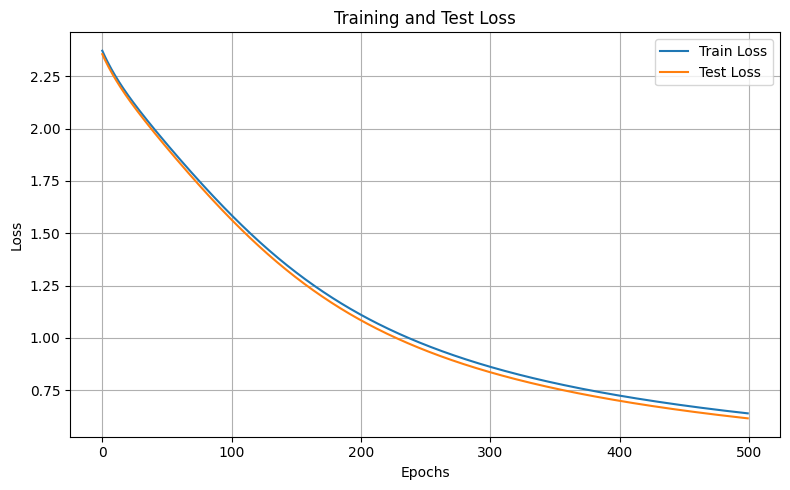

In [18]:
import matplotlib.pyplot as plt
# Plot of training and test loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


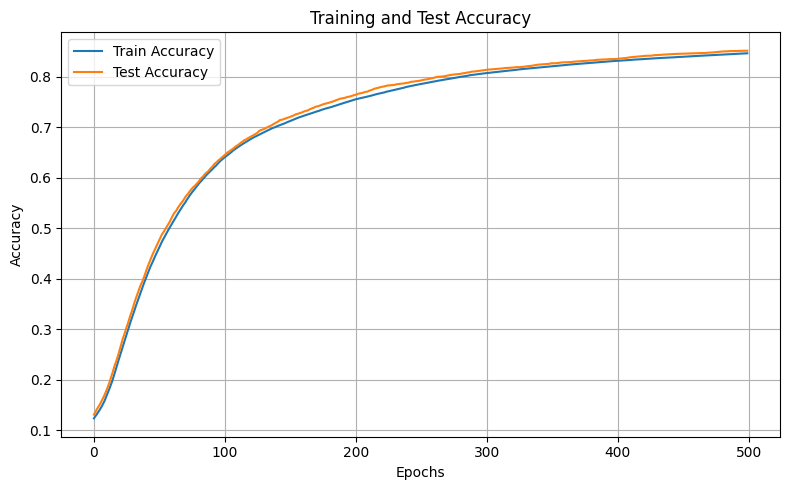

In [19]:
# Plot of training and test Accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


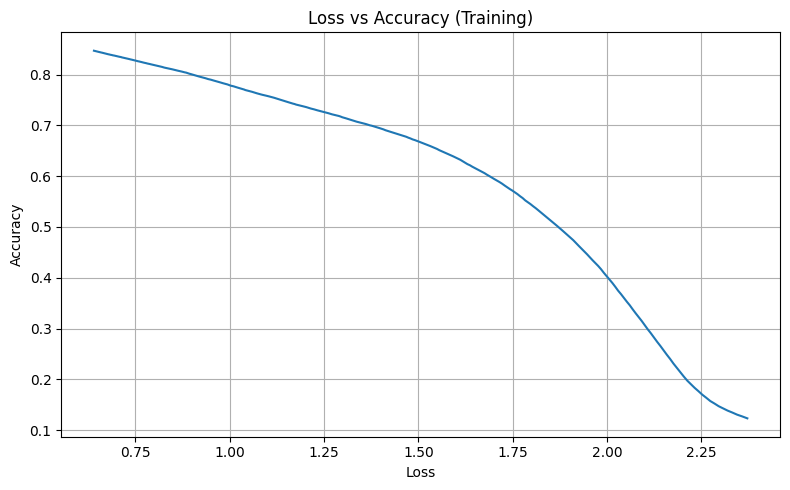

In [20]:
# Plot training accuracy against training loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, train_acc)
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.title("Loss vs Accuracy (Training)")
plt.grid(True)
plt.tight_layout()
plt.show()


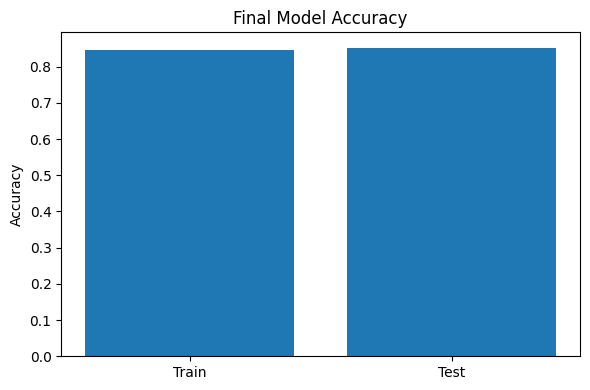

In [21]:
 # Bar plot for final accuracies
final_train_acc = train_acc[-1]
final_test_acc = test_acc[-1]

plt.figure(figsize=(6, 4))
plt.bar(["Train", "Test"], [final_train_acc, final_test_acc])
plt.ylabel("Accuracy")
plt.title("Final Model Accuracy")
plt.tight_layout()
plt.show()
